In [62]:
%matplotlib inline
import os, glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import curve_fit
import scipy.optimize as opt
import matplotlib.lines as mlines
import pandas as pd
import csv
from skimage import io
from matplotlib.gridspec import GridSpec
from scipy.io import loadmat
import matplotlib
from matplotlib.backends.backend_pdf import PdfPages
matplotlib.rcParams.update({'font.size': 24, 'font.family':'sans-serif', 'font.sans-serif':'Arial', 'pdf.fonttype':42})

# laser power setting
###################################################################################################################################
# factory data

# data_dir = 'K:/Farinella_2024_repo/raw_data/Fig4/Factory_Settings/Thermal_Camera_Images/' # filepath has to be changed dep. on where dropbox is
# saveTag='_fact'

# bkg_data =             loadmat(data_dir+'NoScanning_31.2C_218Vbias_270Vpp_BiasOn.mat')

# file = (data_dir+'100kHz_31.2C_218Vbias_270Vpp_BiasOn.mat')  # 100KHz
# file = (data_dir+'160kHz_31.2C_218Vbias_270Vpp_BiasOn.mat')  # 160KHz
# file = (data_dir+'220kHz_31.2C_218Vbias_270Vpp_BiasOn.mat')  # 220KHz
# file = (data_dir+'280kHz_31.2C_218Vbias_270Vpp_BiasOn.mat')  # 280KHz

###################################################################################################################################

data_dir = 'K:/Farinella_2024_repo/raw_data/Fig4/Optimized_Settings/Thermal_Camera_Images/' # filepath has to be changed dep. on where dropbox is
saveTag='_opt'
# temp_data =             loadmat(data_dir+'NoScanning_31.2C_218Vbias_270Vpp_BiasOn.mat')

file = (data_dir+'100kHz_31.2C_218Vbias_270Vpp_BiasOn.mat')  # 100KHz
# file = (data_dir+'160kHz_31.0C_230Vbias_278Vpp_BiasOn.mat')  # 160KHz
# file = (data_dir+'220kHz_30.2C_224Vbias_264Vpp_BiasOn.mat')  # 220KHz
file = (data_dir+'280kHz_26.0C_249Vbias_194Vpp_BiasOn.mat')  # 280KHz - something weird?
# file = (data_dir+'340kHz_24.5C_207Vbias_176Vpp_BiasOn.mat')  # 340KHz
# file = (data_dir+'400kHz_24.4C_225Vbias_142Vpp_BiasOn.mat')  # 400KHz
# file = (data_dir+'460kHz_25C_293Vbias_224Vpp_BiasOn.mat')    # 460KHz - definitely something weird
file = (data_dir+'520kHz_24.4C_225Vbias_142Vpp_BiasOn.mat')  # 520KHz
# file = (data_dir+'460kHz_25C_265Vbias_132Vpp_BiasOn.mat')    # 460KHz - new data

###################################################################################################################################
saveName=os.path.basename(file)
saveName = saveName[0:len(saveName)-4]+saveTag

temp_data = loadmat(file)
# yshift = 21 # 460-v2
# xshift = -13 # 460-v2

yshift = 19 # optimized
xshift = -2 # optimized

xlim=[280,325]
ylim=[240,285]

x_min_idx = 300+xshift; # optimized
x_max_idx = 320+xshift; # optimized

y_min_idx = 269-yshift; # optimized
y_max_idx = 283-yshift; # optimized



# xlim=[270,315]
# ylim=[240,285]

# yshift = 21 # optimized
# xshift = -14 # optimized

# x_min_idx = 300+xshift; # optimized
# x_max_idx = 320+xshift; # optimized

# y_min_idx = 269-yshift; # optimized
# y_max_idx = 283-yshift; # optimized



# x_min_idx = 410;
# x_max_idx = 427;

# y_min_idx = 266;
# y_max_idx = 280;

meta NOT subset; don't know how to subset; dropped


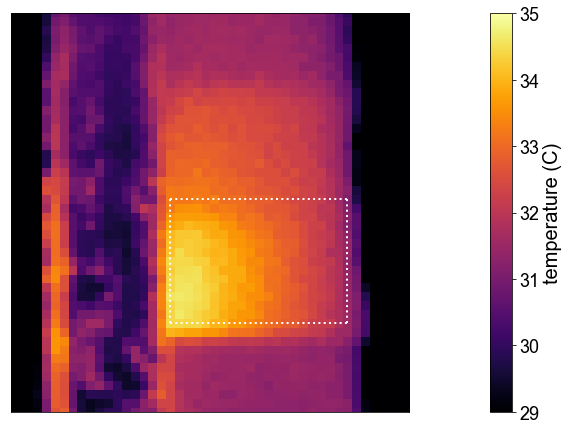

In [63]:

fig, ax = plt.subplots(figsize=(10,8))
gs = GridSpec(120,120)#,bottom=0.18,left=0.18,right=0.88)

# t = ax.set_title('No laser')
# t.set_y(1.025);

ax = plt.subplot(gs[0:110,0:110])
h = ax.imshow(temp_data['Frame'],cmap='inferno', vmin=29, vmax=35,interpolation='none') #, vmin=30, vmax=35)
# h = ax.pcolor(temp_data['Frame']-bkg_data['Frame'], cmap='inferno')
ax.set_aspect('equal')
imshow_cleanup(ax)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

cbaxes = fig.add_subplot(gs[0:110,115:120])
cbaxes.tick_params(labelsize=18)
cb = fig.colorbar(h, cax = cbaxes, orientation='vertical')
cb.set_label('temperature (C)',fontsize=20)
cbtext = cb.ax.yaxis.get_offset_text()
ax.plot([x_min_idx,x_max_idx],[y_min_idx,y_min_idx],':',color=(1,1,1),linewidth=2)
ax.plot([x_min_idx,x_max_idx],[y_max_idx,y_max_idx],':',color=(1,1,1),linewidth=2)
ax.plot([x_min_idx,x_min_idx],[y_min_idx,y_max_idx],':',color=(1,1,1),linewidth=2)
ax.plot([x_max_idx,x_max_idx],[y_min_idx,y_max_idx],':',color=(1,1,1),linewidth=2)
ax.set_yticks([])
ax.set_xticks([])

with PdfPages('K:/Farinella_2024_repo/processed_data/SuppFig1/'+saveName+'.pdf') as pdf:
    pdf.savefig(fig,bbox_inches='tight',pad_inches=0.05,dpi=600)  # saves the current figure into a pdf page


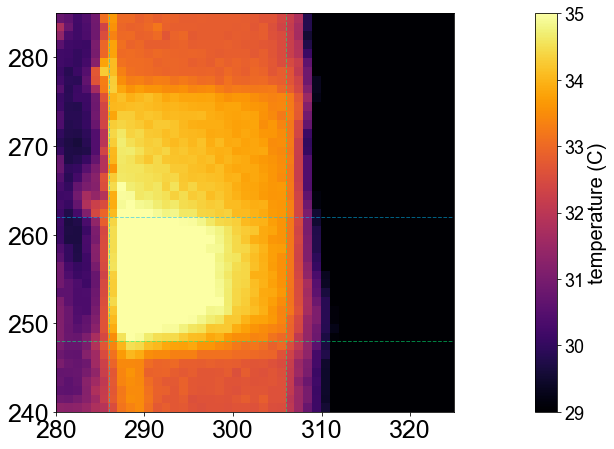

In [59]:
fig, ax = plt.subplots(figsize=(10,8))
gs = GridSpec(120,120)#,bottom=0.18,left=0.18,right=0.88)
mpl.rcParams.update({'font.size': 25})

t = ax.set_title('No laser')
t.set_y(1.025);

ax = plt.subplot(gs[0:110,0:110])
h = ax.pcolor(temp_data['Frame'],cmap='inferno', vmin=29, vmax=35) #, vmin=30, vmax=35)
# h = ax.pcolor(temp_data['Frame']-bkg_data['Frame'], cmap='inferno')
ax.set_aspect('equal')

ax.set_xlim(280,325)
ax.set_ylim(240,285)

cbaxes = fig.add_subplot(gs[0:110,115:120])
cbaxes.tick_params(labelsize=18)
cb = fig.colorbar(h, cax = cbaxes, orientation='vertical')
cb.set_label('temperature (C)',fontsize=20)
cbtext = cb.ax.yaxis.get_offset_text()

ax.axvline(x = x_min_idx, ymin = 0, ymax = 480, linewidth = 1.0, color = 'deepskyblue',linestyle='dashed', alpha = 0.5)
ax.axvline(x = x_max_idx, ymin = 0, ymax = 480, linewidth = 1.0, color = 'springgreen',linestyle='dashed', alpha = 0.5)


ax.axhline(y = y_max_idx, xmin = 0, xmax = 640, linewidth = 1.0, color = 'deepskyblue',linestyle='dashed', alpha = 0.5)
ax.axhline(y = y_min_idx, xmin = 0, xmax = 640, linewidth = 1.0, color = 'springgreen',linestyle='dashed', alpha = 0.5)



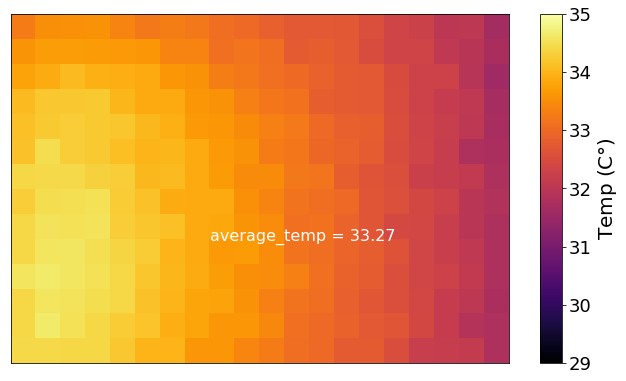

In [12]:
#emissivity = 0.8

fig, ax = plt.subplots(figsize=(10,7))
gs = GridSpec(120,120)#,bottom=0.18,left=0.18,right=0.88)
mpl.rcParams.update({'font.size': 25})

t = ax.set_title('No laser')
t.set_y(1.025);

ax = plt.subplot(gs[0:110,0:110])
# h = ax.pcolor(temp_data['Frame'][200:400,325:525], cmap='inferno')
h = ax.pcolor(temp_data['Frame'][y_min_idx:y_max_idx,x_min_idx:x_max_idx], cmap='inferno', vmin=29, vmax=35)
ax.set_aspect('equal')


ax.set_xticks([])  # Hide x-axis ticks
ax.set_yticks([])  # Hide y-axis ticks

cbaxes = fig.add_subplot(gs[0:110,115:120])
cbaxes.tick_params(labelsize=18)
cb = fig.colorbar(h, cax = cbaxes, orientation='vertical')
cb.set_label('Temp (C$\degree$)',fontsize=20)
cbtext = cb.ax.yaxis.get_offset_text()


ax.annotate("average_temp = "+str(round(np.mean(temp_data['Frame'][y_min_idx:y_max_idx, x_min_idx:x_max_idx]), 2)), xy = (ax.get_xlim()[0] + (ax.get_xlim()[1]-
            ax.get_xlim()[0])*0.40, ax.get_ylim()[1]-(ax.get_ylim()[1]-ax.get_ylim()[0])*0.65),
            fontsize=16, color='white');